In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# For seaborn visualization
%matplotlib inline

In [7]:
# Assume athelet_events = df
df=pd.read_csv(r'C:\Users\USER\OneDrive\Desktop\athlete_events.csv')

<AxesSubplot:>

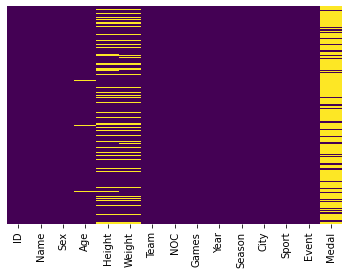

In [8]:
#Heatmap showing off the missing values in each column
# plt.figure(figsize=(10,20))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
df.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


In [10]:
#Converting Medal Column to a appropriate value
df['Medal'].fillna('No Medal',inplace=True)

<Figure size 7200x3600 with 0 Axes>

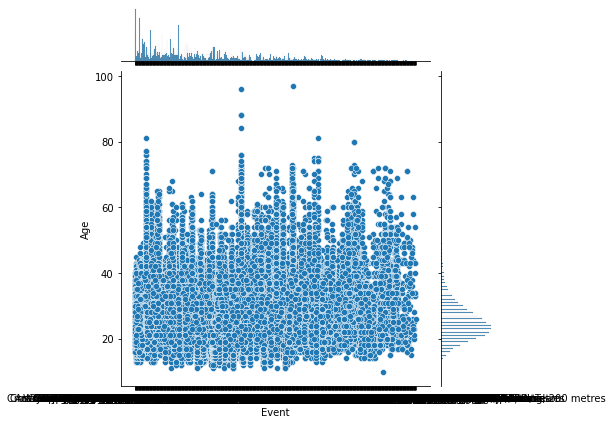

In [11]:
# Correlation between Age and Event Columns
plt.figure(figsize=(100,50))
sns.jointplot(x='Event',y='Age',data=df)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

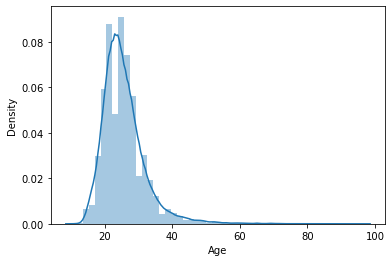

In [12]:
# Showing skeweness of distribution
sns.distplot(df['Age'])

In [13]:
# Filling missing values in Age column using "Multivariate Imputation(Age)"
gb=round(df.groupby(['Event']).mean()['Age'])
for i in range(len(df['Age'])):
    if df['Age'].isnull().iloc[i]:
        event_loc=df['Event'].iloc[i]
        check_Null=gb[event_loc]
        if check_Null!=check_Null:
#             Since distribution is skewed
            df['Age'].iloc[i]=round(df['Age'].median()) 
        else:
            df['Age'].iloc[i]=gb[event_loc]

C:\Users\USER\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


<Figure size 7200x3600 with 0 Axes>

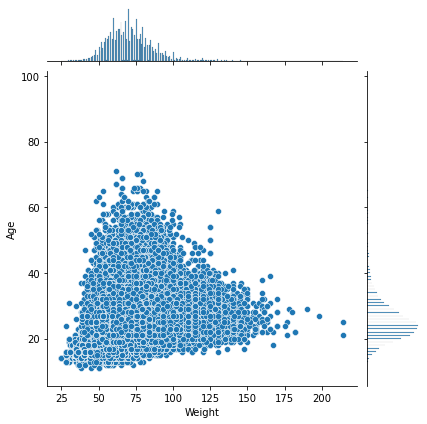

In [14]:
# Correlation between Age and Weight Columns
plt.figure(figsize=(100,50))
sns.jointplot(x='Weight',y='Age',data=df)

<Figure size 7200x3600 with 0 Axes>

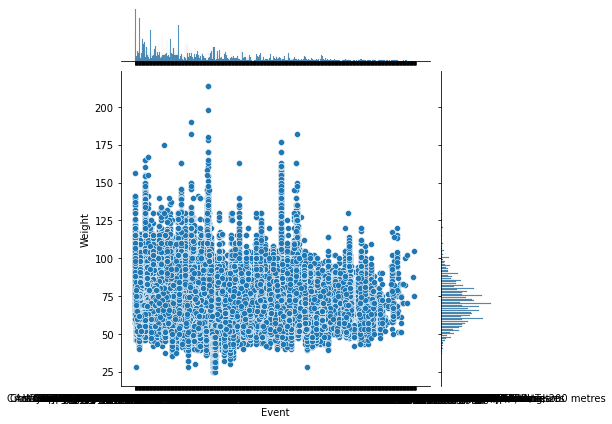

In [15]:
# Correlation between Weight and Event Columns
plt.figure(figsize=(100,50))
sns.jointplot(x='Event',y='Weight',data=df)

In [16]:
# Filling missing values in Weight column using "Multivariate Imputation(Event,Age)"
gb=df.groupby(['Event','Age']).mean()['Weight']
for i in range(len(df['Weight'])):
    if df['Weight'].isnull().iloc[i]:
        event_loc=df['Event'].iloc[i]
        age_loc=df['Age'].iloc[i]
        check_Null=gb[event_loc][age_loc]
        if check_Null!=check_Null:
            df['Weight'].iloc[i]=df['Weight'].mean()
        else:    
            df['Weight'].iloc[i]=gb[event_loc][age_loc]

C:\Users\USER\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


<Figure size 7200x3600 with 0 Axes>

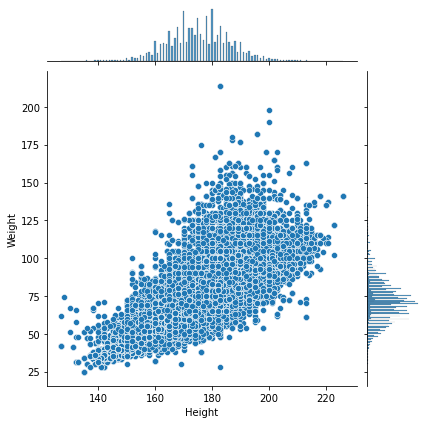

In [17]:
# Correlation between Weight and Height Columns
plt.figure(figsize=(100,50))
sns.jointplot(x='Height',y='Weight',data=df)

<Figure size 7200x3600 with 0 Axes>

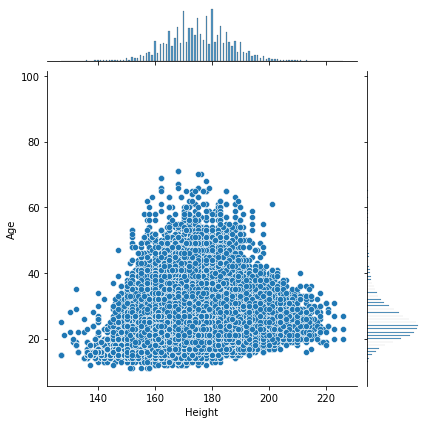

In [18]:
# Correlation between Age and Height Columns
plt.figure(figsize=(100,50))
sns.jointplot(x='Height',y='Age',data=df)

In [19]:
# Filling missing values in Height column using "Multivariate Imputation(Weight,Age)"
gb=df.groupby(['Weight','Age']).mean()['Height']
for i in range(len(df['Height'])):
    if df['Height'].isnull().iloc[i]:
        weight_Loc=df['Weight'].iloc[i]
        age_Loc=df['Age'].iloc[i]
        check_Null=gb[weight_Loc][age_Loc]
        if check_Null!=check_Null:
            df['Height'].iloc[i]=df['Height'].mean()
        else:    
            df['Height'].iloc[i]=gb[weight_Loc][age_Loc]

C:\Users\USER\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


<AxesSubplot:>

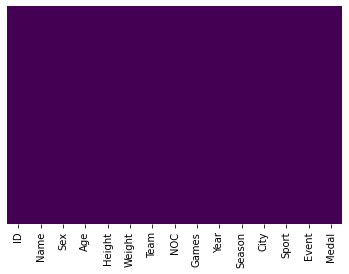

In [20]:
#Heatmap showing off the missing values in each column
# plt.figure(figsize=(10,20))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# question2:
# heights of the DEN women players over the years who participated in winter season

In [80]:
df_Women = df[(df['Sex'].str.contains('F')) & (df['Season'].str.contains('Winter'))].dropna(axis=0, subset=['Age'])

In [81]:
df_Women_DEN = df_Women[df_Women['NOC'].str.contains('DEN')]

In [82]:
# Extract Age informations
df_Women_DEN_Height = df_Women_DEN[['Year', 'Height']]

Text(0, 0.5, 'Height')

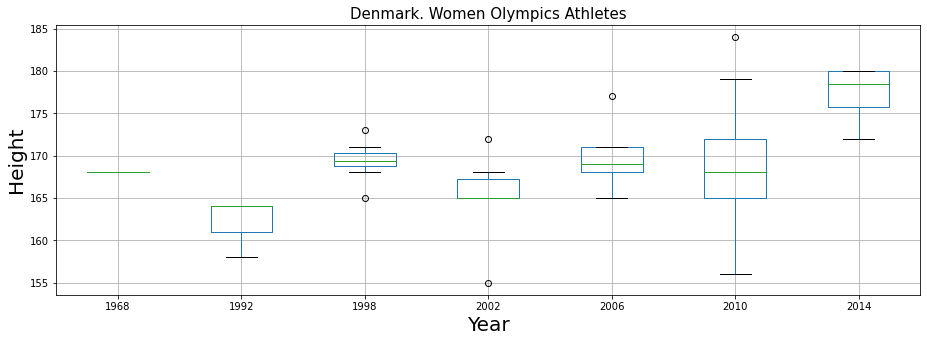

In [84]:
# boxplot of man height vs year in DEN in summer season
df_Women_DEN_Height.boxplot(by=['Year'], figsize=(15,5))
plt.title('Denmark. Women Olympics Athletes', size=15)
plt.suptitle('')
plt.xlabel('Year',size=20)
plt.ylabel('Height',size=20)

# Question 3
# Number of players of top 10 countries who participated in the olympics over the years

In [48]:
# Top Country Participate in Olympic
top10Countries = df.value_counts('Team').head(10)
top10Countries

Team
United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
dtype: int64

<AxesSubplot:title={'center':'Top 10 Countries Participate In Olympic'}, ylabel='Team'>

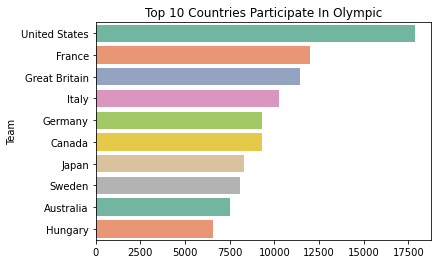

In [49]:
# Plot 10 top countries
plt.title('Top 10 Countries Participate In Olympic')
sns.barplot(x=top10Countries, y=top10Countries.index, palette = 'Set2')

# question 4
# comparison between gender participation in all sports during winter season

<AxesSubplot:xlabel='count', ylabel='Sport'>

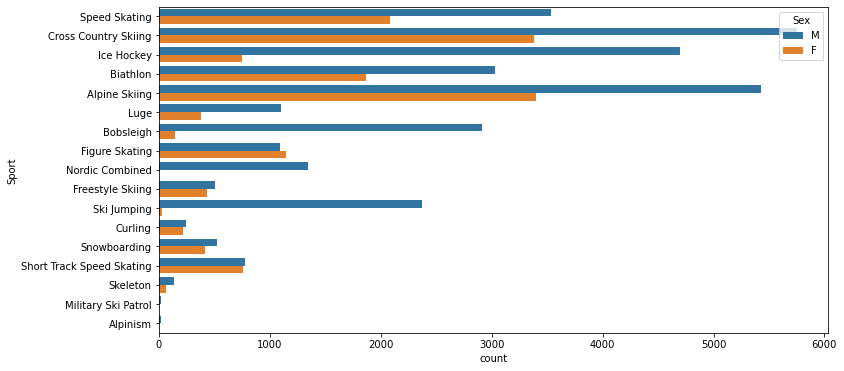

In [87]:
# Male And Female Participant in Each Winter Sport
plt.figure(figsize=(12,6))
sns.countplot(data=df, y = df.query("Season == 'Winter'")['Sport'], hue='Sex')